In [1]:
print("Welcome to Machine Learning!")
import sys

assert sys.version_info >= (3, 7)
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

Welcome to Machine Learning!


In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

First five rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Dataset information:
<class 'pandas.core.f

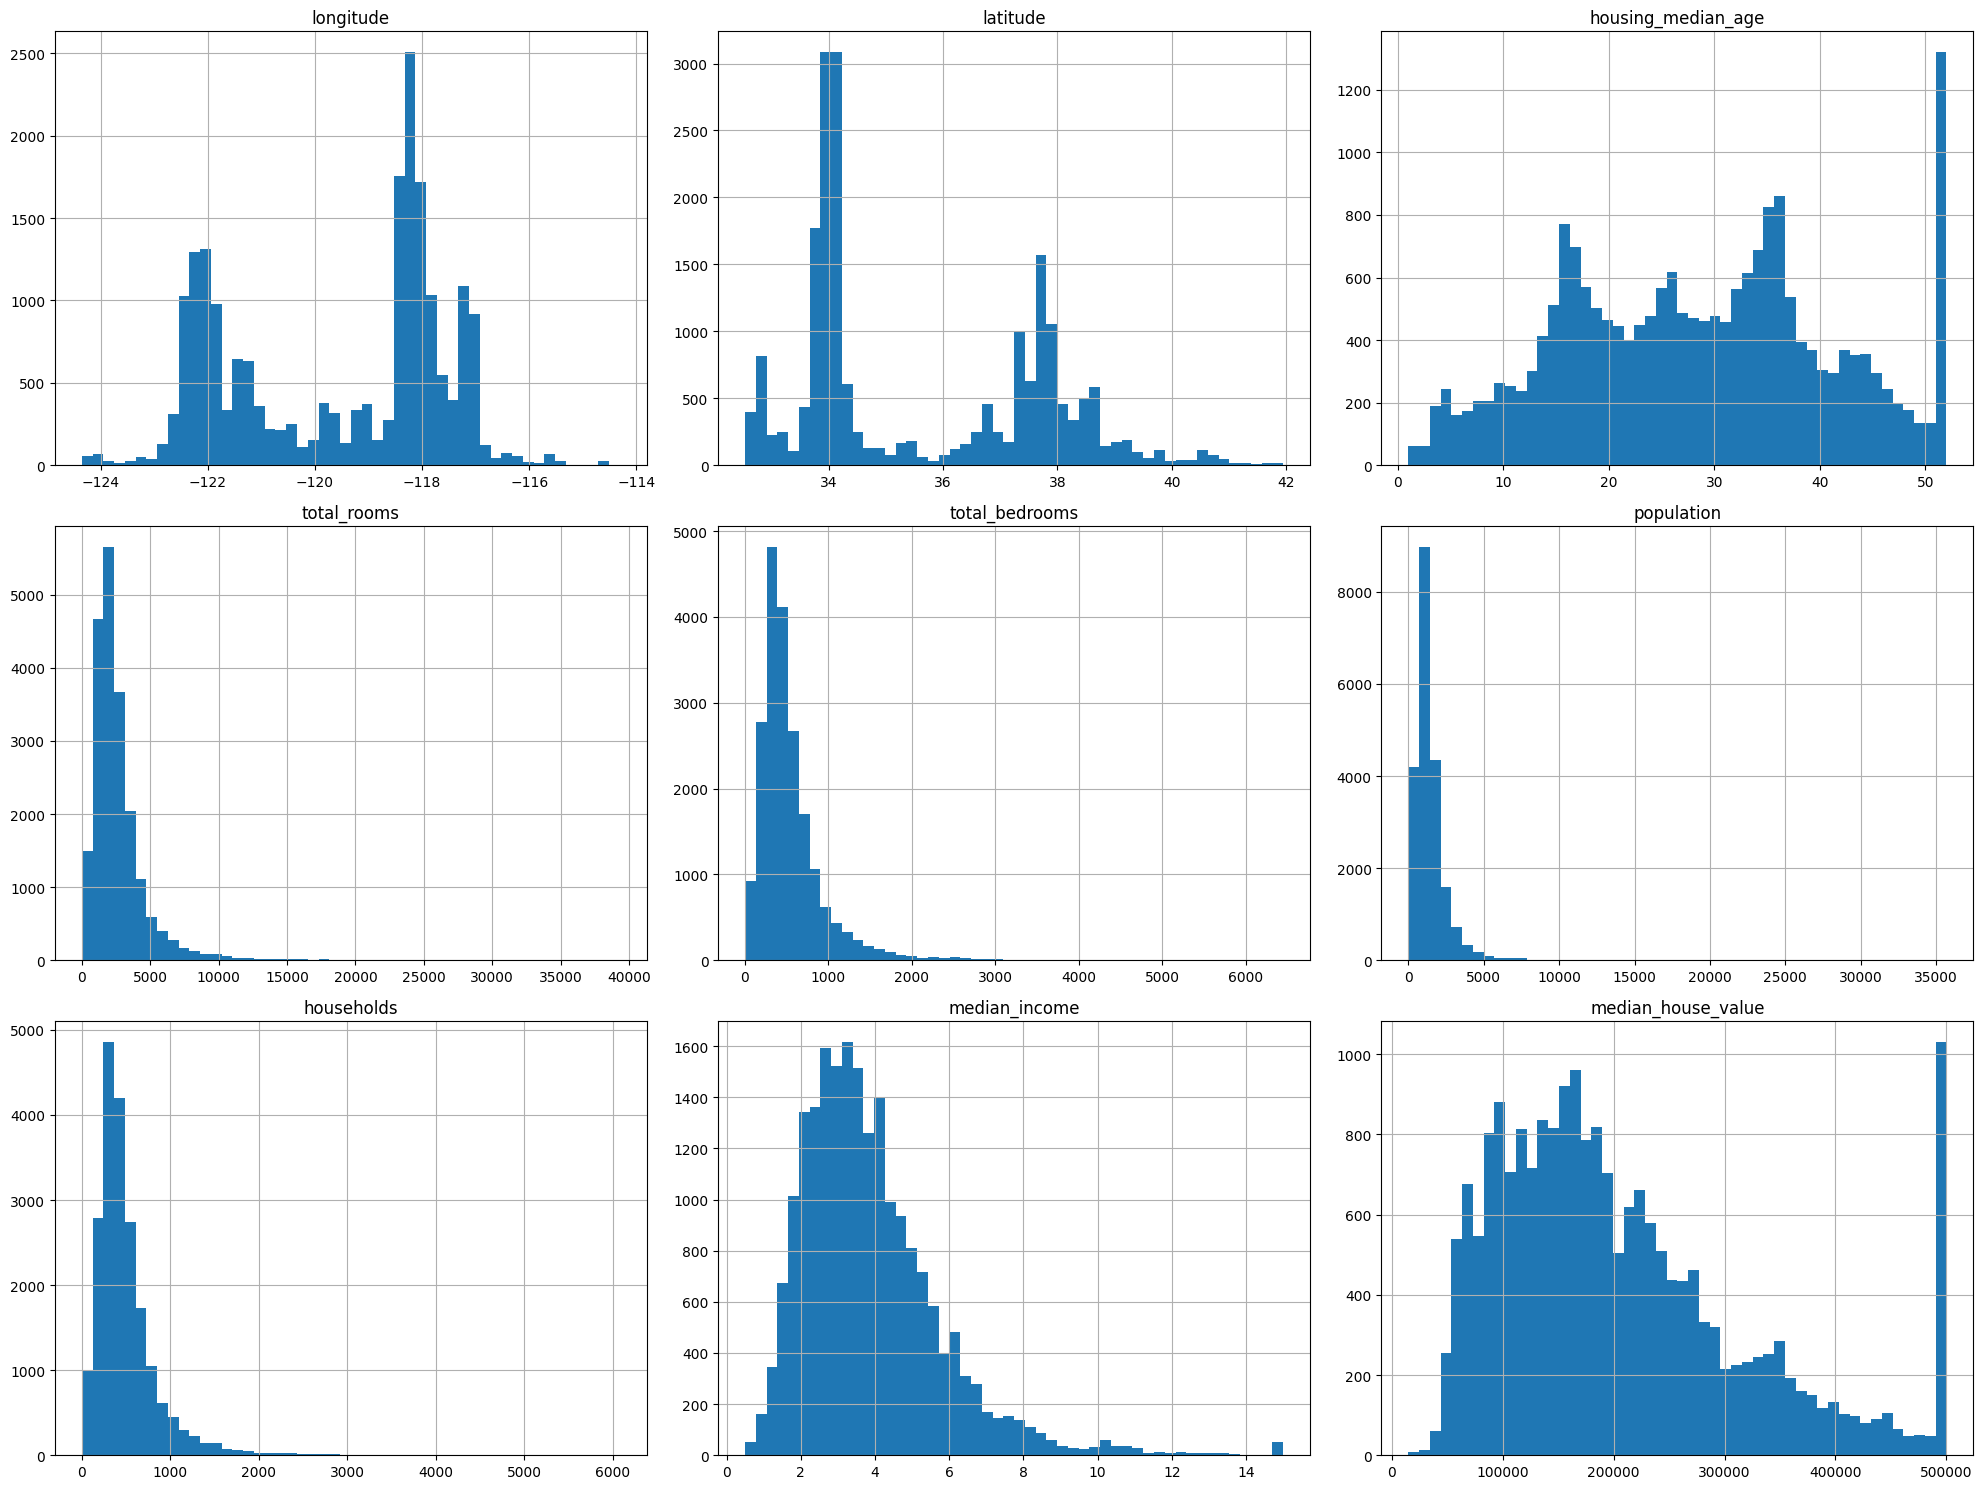

ValueError: could not convert string to float: 'NEAR BAY'

In [5]:
print("First five rows of the dataset:")
print(housing.head())

print("\nDataset information:")
print(housing.info())

print("\nSummary statistics of the dataset:")
print(housing.describe())

print("\nChecking for missing values:")
print(housing.isnull().sum())

print("\nDistribution of 'ocean_proximity':")
print(housing['ocean_proximity'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each numerical attribute
housing.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

# Plot the correlation matrix
corr_matrix = housing.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatter plot of 'median_house_value' vs 'median_income'
plt.figure(figsize=(10, 6))
plt.scatter(housing['median_income'], housing['median_house_value'], alpha=0.2)
plt.title("Median House Value vs. Median Income")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

In [6]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

# Visualizing Geographical Data

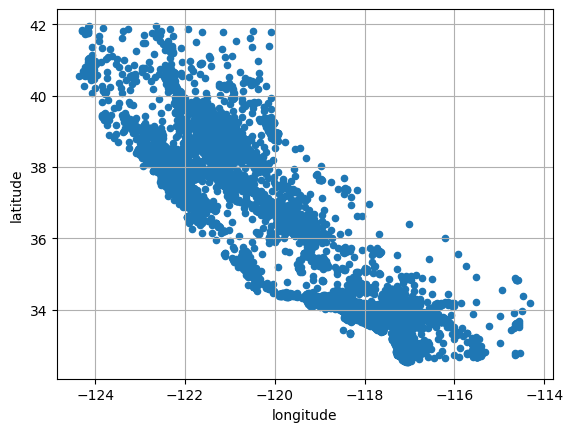

In [8]:
import matplotlib.pyplot as plt

# Scatter plot for longitude and latitude with grid
housing.plot.scatter(x="longitude", y="latitude", grid=True)

# Saving the plot
plt.savefig("bad_visualization_plot")

# Display the plot
plt.show()


NameError: name 'save_fig' is not defined

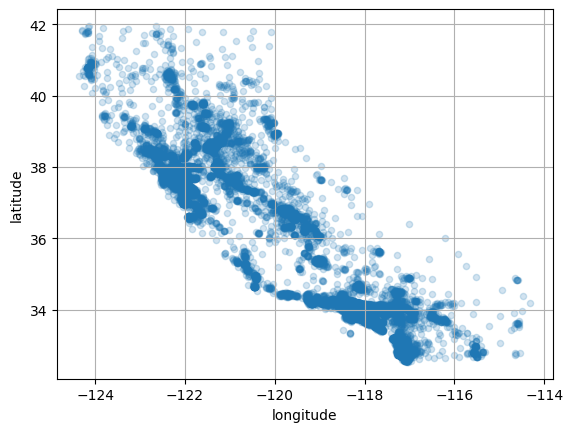

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

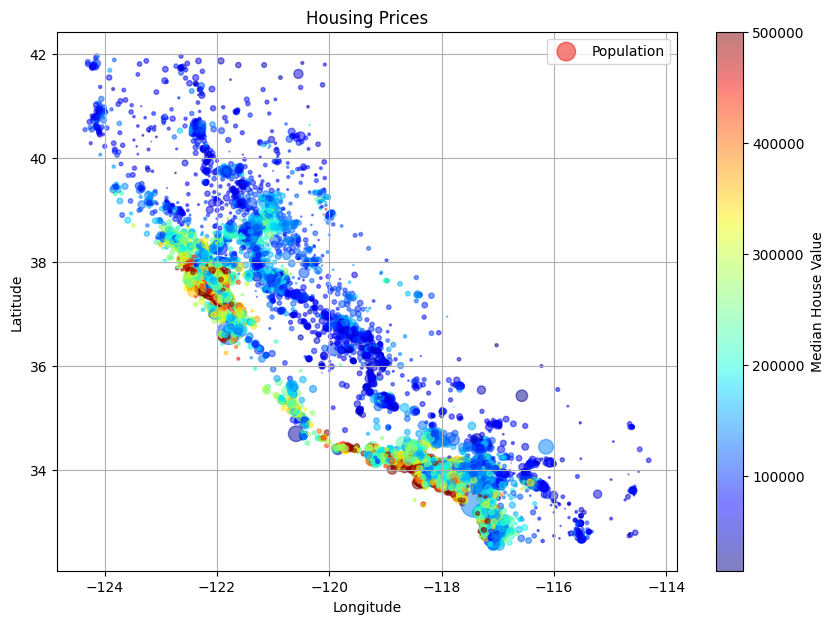

In [10]:
import matplotlib.pyplot as plt

# Create scatter plot with customization
plt.figure(figsize=(10, 7))
scatter = plt.scatter(housing["longitude"], housing["latitude"],
                      s=housing["population"] / 100,
                      c=housing["median_house_value"],
                      cmap="jet", label="population", alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Prices")
plt.colorbar(label="Median House Value")
plt.legend(["Population"])

# Saving the plot
plt.savefig("housing_prices_scatterplot")

# Display the plot
plt.grid(True)
plt.show()


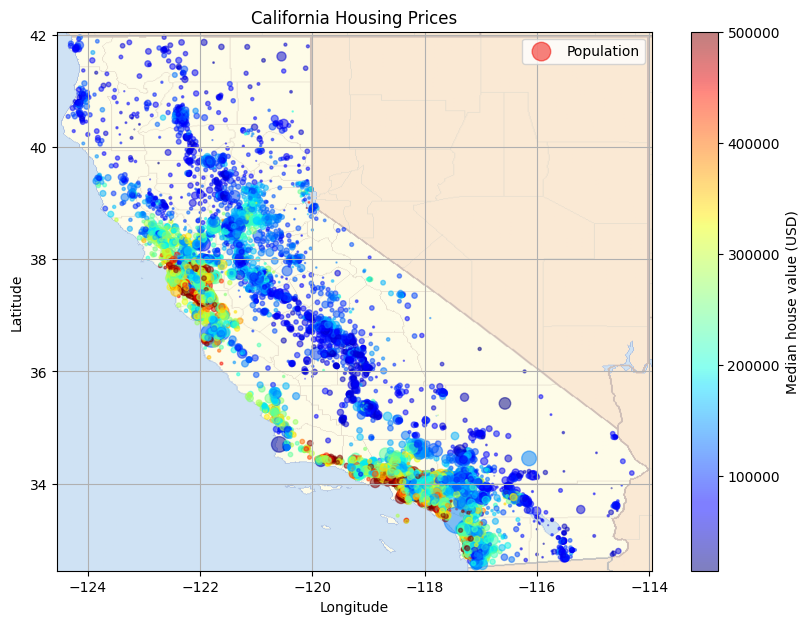

In [11]:
import matplotlib.pyplot as plt
from pathlib import Path

# Define the image path
IMAGES_PATH = Path("images")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# Download the California image if not already present
filename = "california.png"
image_path = IMAGES_PATH / filename
if not image_path.is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, image_path)

# Rename the columns for better readability
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (USD)"
})

# Create the scatter plot with the renamed columns
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    housing_renamed["Longitude"], housing_renamed["Latitude"],
    s=housing_renamed["Population"] / 100,
    c=housing_renamed["Median house value (USD)"],
    cmap="jet", alpha=0.5, label="Population"
)
plt.colorbar(label="Median house value (USD)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices")
plt.legend(["Population"], loc="upper right")

# Load and display the background image of California
california_img = plt.imread(image_path)
axis_limits = [-124.55, -113.95, 32.45, 42.05]
plt.axis(axis_limits)
plt.imshow(california_img, extent=axis_limits, alpha=0.5)

# Save the figure
plt.savefig(IMAGES_PATH / "california_housing_prices_plot")

# Show the plot
plt.grid(True)
plt.show()


Looking for Correlations

In [12]:
corr_matrix = housing.corr(numeric_only=True)

In [13]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

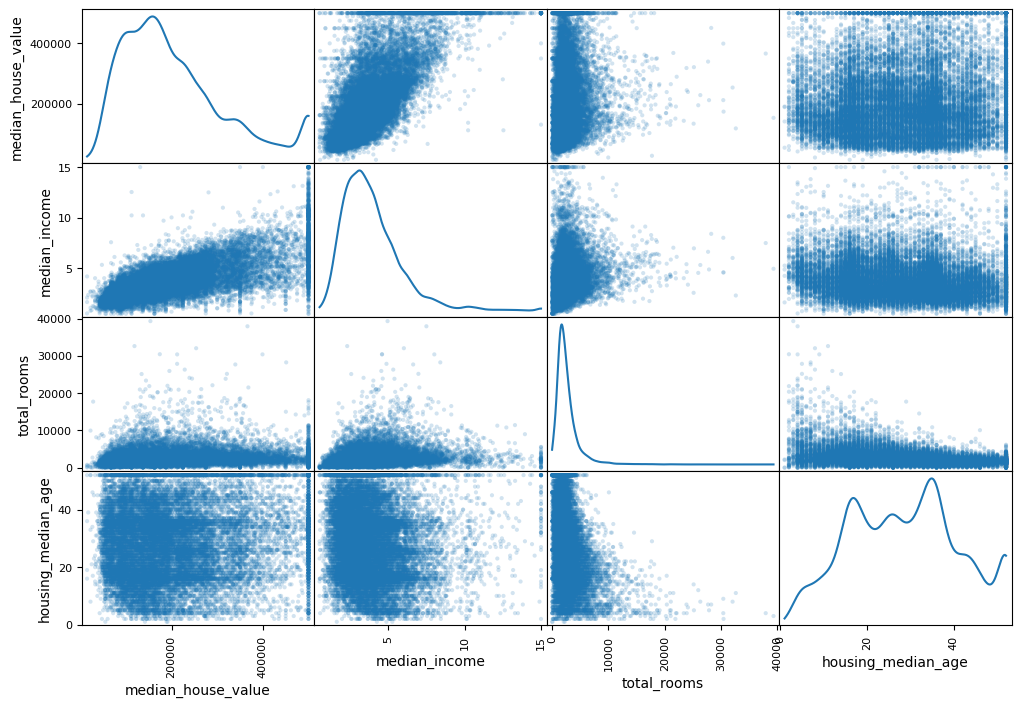

In [14]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Select attributes for the scatter matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

# Create scatter matrix plot
scatter_matrix_plot = scatter_matrix(housing[attributes], figsize=(12, 8), alpha=0.2, diagonal='kde')

# Save the figure
plt.savefig("scatter_matrix_plot")

# Display the plot
plt.show()


NameError: name 'save_fig' is not defined

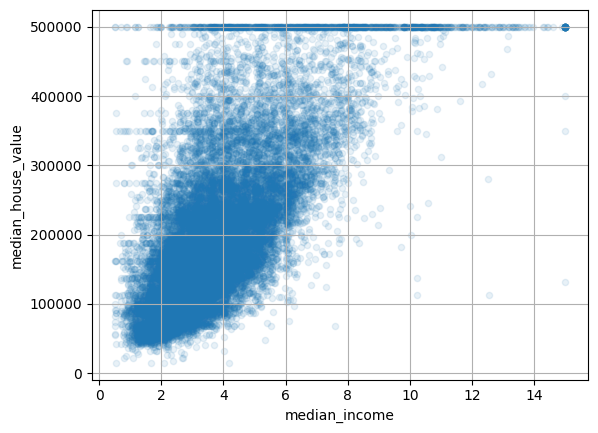

In [15]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

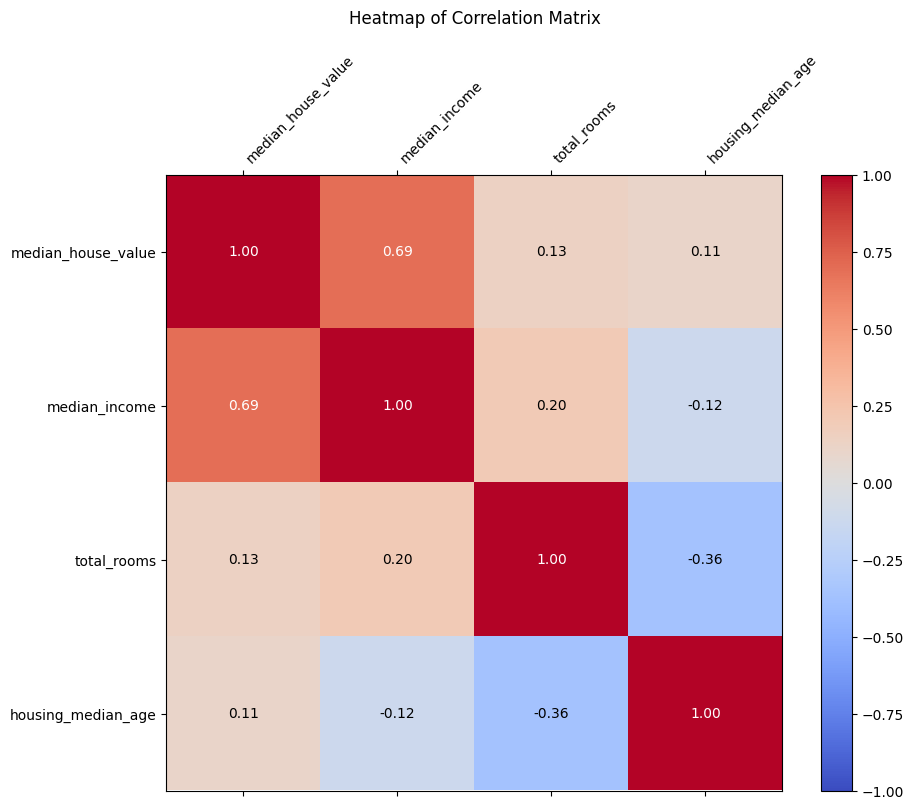

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Select the relevant attributes
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

# Compute the correlation matrix
corr_matrix = housing[attributes].corr().values

# Create a heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

# Set axis ticks and labels
ax.set_xticks(np.arange(len(attributes)))
ax.set_yticks(np.arange(len(attributes)))
ax.set_xticklabels(attributes, rotation=45, ha='left')
ax.set_yticklabels(attributes)

# Add text annotations to the heatmap
for i in range(len(attributes)):
    for j in range(len(attributes)):
        ax.text(j, i, f"{corr_matrix[i, j]:.2f}", ha='center', va='center', color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black')

plt.title('Heatmap of Correlation Matrix', pad=20)

# Save the figure
plt.savefig("correlation_heatmap.png")

# Display the plot
plt.show()


In [18]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY


In [23]:
# Select only numeric columns
numeric_housing = housing.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_housing.corr()

# Print the correlation of all columns with 'median_house_value'
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [33]:
housing_num = housing.select_dtypes(include=[np.number])

In [34]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [36]:
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [37]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [38]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])